In [64]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
def visualize_maze(maze, steps):
    maze_array = np.array(maze)
    steps_array = np.array(steps)

    cmap = plt.cm.colors.ListedColormap(['red', 'white', 'green'])
    bounds = [-0.5, 0.5, 1.5, 2.5]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(maze_array, cmap=cmap, norm=norm)

    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(-.5, len(maze[0]), 1))
    ax.set_yticks(np.arange(-.5, len(maze), 1))

    # Hide axes
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Adding step counts as text on each cell
    for i in range(len(steps_array)):
        for j in range(len(steps_array[0])):
            if steps_array[i][j] != 9999:
                ax.text(j, i, str(steps_array[i][j]), ha='center', va='center', color='black')

    plt.show()



In [66]:
class QNode:
    def __init__(self, value):
        self.value = value
        self.next = None

class Queue:
    def __init__(self):
        self.front = None
        self.rear = None

    def is_empty(self):
        return self.front is None

    def enqueue(self, value):
        new_node = QNode(value)
        if self.rear is None:
            self.front = self.rear = new_node
            return
        self.rear.next = new_node
        self.rear = new_node

    def dequeue(self):
        if self.is_empty():
            raise Exception("Trying to dequeue from an empty queue")
        temp = self.front
        self.front = self.front.next
        if self.front is None:
            self.rear = None
        return temp.value

    def peek(self):
        if self.is_empty():
            raise Exception("Trying to peek from an empty queue")
        return self.front.value

In [67]:
def create_filled_matrix_np(original_matrix, fill_value):
    return np.full_like(original_matrix, fill_value)

In [68]:
class QItem:
    def __init__(self, steps, i, j):
        self.steps = steps
        self.i = i
        self.j = j

Path from start to exit: [(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (5, 3), (6, 3), (7, 3), (7, 2), (7, 1), (8, 1), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 0)]
Steps from start to exit: 25


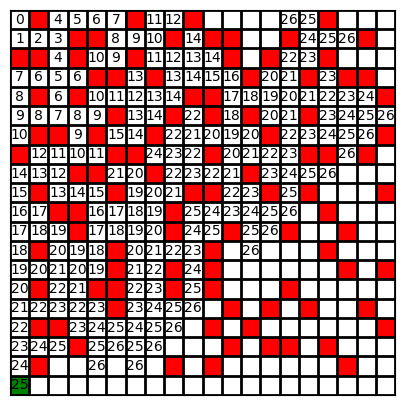

In [73]:
def is_valid_move(maze, x, y, visited):
    if 0 <= x < len(maze) and 0 <= y < len(maze[0]) and not visited[x][y]:
        return maze[x][y] != 0  # Check if the cell is not a wall (0) and not visited.
    return False


def bfs_maze(maze, steps_matrix, start_i, start_j):
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    visited = create_filled_matrix_np(maze, False)
    
    queue = Queue()
    queue.enqueue(QItem(0,start_i, start_j))
    
    steps_matrix[start_i][start_j] = 0
    visited[start_i][start_j] = True

    while not queue.is_empty():
        current = queue.dequeue()

        if maze[current.i][current.j] == 2:
            return current

        for di, dj in directions:
            ni, nj = current.i + di, current.j + dj
            
            if is_valid_move(maze, ni, nj, visited):
                if steps_matrix[ni][nj] > current.steps + 1:
                    steps_matrix[ni][nj] = current.steps + 1
                    queue.enqueue(QItem(current.steps + 1, ni, nj))
                    visited[ni][nj] = True
    return -1



def trace_back_path(steps_m, exit_i, exit_j):
    path = []
    current_i, current_j = exit_i, exit_j
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    path.append((current_i, current_j))

    while steps_m[current_i][current_j] != 0:
        current_step = steps_m[current_i][current_j]

        for di, dj in directions:
            ni, nj = current_i + di, current_j + dj
            if 0 <= ni < len(steps_m) and 0 <= nj < len(steps_m[0]):
                if steps_m[ni][nj] == current_step - 1:
                    path.append((ni, nj))
                    current_i, current_j = ni, nj
                    break

    path.reverse()
    return path

maze = [
    [1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1],
    [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1],
    [1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1],
    [1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1],
    [1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0],
    [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1],
    [1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
    [1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1],
    [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
]

steps_matrix = create_filled_matrix_np(maze, 9999)

result = bfs_maze(maze,steps_matrix , 0, 0)
if result != -1:
    path = trace_back_path(steps_matrix, result.i, result.j)
    print("Path from start to exit:", path)
    print("Steps from start to exit:", result.steps)
else:
    print("No path found.")

visualize_maze(maze, steps_matrix)


In [74]:
maze_test1 = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]
]


maze_test2 = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
]


maze_test3 = [
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
    [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
]


Test Case 1: Simple Path
Path from start to exit: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19)]
Steps from start to exit: 19


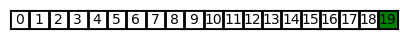

Test Case 2: No Exit
No path found.


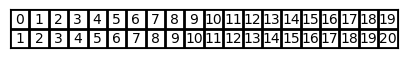

Test Case 3: Multiple Paths to Exit
Path from start to exit: [(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (2, 19), (3, 19), (4, 19)]
Steps from start to exit: 23


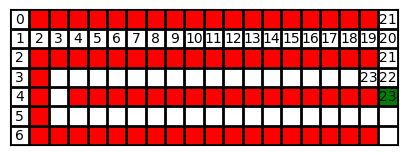

In [75]:
def run_test(maze):
    steps_matrix = create_filled_matrix_np(maze, 9999)
    result = bfs_maze(maze, steps_matrix, 0, 0)
    if result != -1:
        path = trace_back_path(steps_matrix, result.i, result.j)
        print("Path from start to exit:", path)
        print("Steps from start to exit:", result.steps)
    else:
        print("No path found.")
    visualize_maze(maze, steps_matrix)

# Execute tests
print("Test Case 1: Simple Path")
run_test(maze_test1)

print("Test Case 2: No Exit")
run_test(maze_test2)

print("Test Case 3: Multiple Paths to Exit")
run_test(maze_test3)

From X to Y

In [23]:
class TNode:
    def __init__(self, parent, value, prev_op):
        self.parent = parent
        self.value = value
        self.prev_op = prev_op

class QNode:
    def __init__(self, value):
        self.value = value
        self.next = None

class Queue:
    def __init__(self):
        self.front = None
        self.rear = None

    def is_empty(self):
        return self.front is None

    def enqueue(self, value):
        new_node = QNode(value)
        if self.rear is None:
            self.front = self.rear = new_node
            return
        self.rear.next = new_node
        self.rear = new_node

    def dequeue(self):
        if self.is_empty():
            raise Exception("Trying to dequeue from an empty queue")
        temp = self.front
        self.front = self.front.next
        if self.front is None:
            self.rear = None
        return temp.value

    def peek(self):
        if self.is_empty():
            raise Exception("Trying to peek from an empty queue")
        return self.front.value
      
class BitVector:
    def __init__(self, size):
        self.size = size
        self.bits = [0] * ((size + 7) // 8)

    def set(self, index):
        byte_index = index // 8
        bit_index = index % 8
        self.bits[byte_index] |= (1 << bit_index)

    def check(self, index):
        byte_index = index // 8
        bit_index = index % 8
        return (self.bits[byte_index] & (1 << bit_index)) != 0

def op_a(value, Y, m):
    return min(value * m, Y * 2), 'a'

def op_b(value):
    return value - 2 , 'b'

def op_c(value):
    return value - 1 , 'c'


def from_x_to_y(X, Y, m):
    results = BitVector(100)

    operations = [lambda x: op_a(x, Y, m), op_b, op_c]
    
    q = Queue()
    
    start = TNode(None, X, None)
    
    q.enqueue(start)

    results.set(start.value)
    
    if start.value == Y:
        return start
    else:
        while not q.is_empty():
            cur = q.dequeue()
            
            for op in operations:
                res, name = op(cur.value)
                if res == Y:
                    return TNode(cur, res, name)
                if not results.check(res):
                    results.set(res)
                    q.enqueue(TNode(cur, res, name))
    return -1



def build_path(end_node):
    path = []
    current_node = end_node
    while current_node is not None:
        if current_node.prev_op is not None:
            path.append((current_node.value, current_node.prev_op))
        else:
            path.append((current_node.value, 'Start'))
        current_node = current_node.parent

    path.reverse()
    return path


res = from_x_to_y(25, 26, 4)

if res != -1:
    full_path = build_path(res)
    print("Path from start to exit:", full_path)
else:
    print("No path found.")

Path from start to exit: [(25, 'Start'), (23, 'b'), (21, 'b'), (19, 'b'), (17, 'b'), (15, 'b'), (13, 'b'), (11, 'b'), (9, 'b'), (7, 'b'), (28, 'a'), (26, 'b')]


SEND + MORE

In [117]:
def reverseString(s):
    
    def helper(string):
        cur_len = len(string)
        if cur_len == 1:
            return string
        else:
            first = string[0]
            rest = string[1:]
            return helper(rest) + first
    
    s = helper(s)    

    
    
str = "hello"

reverseString(str)
 
str

'hello'

In [6]:
def check_full_validation(mapping):
    send = int("".join(str(mapping[c]) for c in "SEND"))
    more = int("".join(str(mapping[c]) for c in "MORE"))
    money = int("".join(str(mapping[c]) for c in "MONEY"))
    return send + more == money

def solve_puzzle(letters, first_letters, available_digits, current_index, mapping, keys, target_length):
    if current_index == len(letters):
        if check_full_validation(mapping):
            return mapping
        return None

    for digit in available_digits:
        current_letter = letters[current_index]
        if digit == 0 and current_letter in first_letters:
            continue
        mapping[current_letter] = digit
        new_available_digits = available_digits - {digit}
        result = solve_puzzle(letters, first_letters, new_available_digits, current_index + 1, mapping, keys, target_length)
        if result is not None:
            return result
        mapping[current_letter] = None 

    return None

def cryptarithmetic_puzzle():
    letters = "SENDMORY"
    first_letters = {"S", "M"}
    available_digits = set(range(10))
    mapping = {letter: None for letter in letters}
    keys = ["SEND", "MORE", "MONEY"]
    target_length = len(keys[-1])

    solution = solve_puzzle(letters, first_letters, available_digits, 0, mapping, keys, target_length)
    if solution:
        print("Solution Found:")
        print(solution)
        send = "".join(str(solution[c]) for c in "SEND")
        more = "".join(str(solution[c]) for c in "MORE")
        money = "".join(str(solution[c]) for c in "MONEY")
        print(f"{send} + {more} = {money}")
    else:
        print("No solution exists.")

cryptarithmetic_puzzle()



Solution Found:
{'S': 9, 'E': 5, 'N': 6, 'D': 7, 'M': 1, 'O': 0, 'R': 8, 'Y': 2}
9567 + 1085 = 10652
